### Import the Necessary Libraries

In [1]:
import warnings
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
warnings.simplefilter(action="ignore", category=FutureWarning)

### GLOB

In Python, glob is a module that is used to search for files and directories in a specified directory based on a pattern. It provides a convenient way to find files that match a certain pattern or extension.

The below are enlistings that can be done with glob module.

Recursive file search: glob can be used to search for files recursively in a directory tree. For example, the pattern **/*.txt matches all .txt files in the current directory and its subdirectories.

Flexible pattern matching: glob supports various pattern matching rules, including wildcards (* and ?), character sets ([]), and alternation ({}). This makes it easy to search for files based on complex patterns, such as all files that start with a certain prefix, have a certain extension, and contain a specific string in their name.

Cross-platform compatibility: glob works on multiple operating systems, including Windows, macOS, and Linux. This means that you can write code that works on any platform without having to worry about platform-specific file path syntax.

Integration with other libraries: glob can be used in combination with other Python libraries to perform more complex file operations. For example, you can use glob to search for all files of a certain type, and then use pandas to read them into a single dataframe.

Automation of file processing tasks: glob can be used to automate tasks that involve processing multiple files, such as data cleaning or analysis. For example, you can use glob to search for all CSV files in a directory, and then loop through each file to extract and transform data.

Overall, glob is a powerful and flexible tool for searching and processing files in Python, and can save you a lot of time and effort when working with large sets of data.

In [2]:
dir_path = 'C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG'

In [3]:
# Search for all .csv files in the directory
files = glob(dir_path + '/*.csv')

In [4]:
for file in files[:]:
    print(file)
# Here, I extracted 6 files of Customer Segmenetation and we can see that they are all available.

C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG\Customer_Segmentation1.csv
C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG\Customer_Segmentation2.csv
C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG\Customer_Segmentation3.csv
C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG\Customer_Segmentation4.csv
C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG\Customer_Segmentation5.csv
C:/Users/Akon.usoh/Desktop/PERSONAL/2023 PROJECTS/CUST_SEG\Customer_Segmentation6.csv


In [5]:
# Define the wrangle function to clean each CSV file
def wrangle(file):
    df = pd.read_csv(file)
        
    return df

In [6]:
# Create an empty list to store the cleaned DataFrames
frames = []

# Loop over each CSV file and clean the data using the wrangle function
for file in files:
    df = wrangle(file)
    frames.append(df)

In [7]:
frames[0].head(2)

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
0,Mrs. Grace Vaughan,Female,08/05/1990,Bookkeeper,Michigan,302-08-8444,True,Grace_Vaughan1627@gnjps.digital,4-213-101-7036,NaN,258315802,308043053,406
1,Ms. Jacqueline Briggs,Female,11/15/1953,Clerk,Maryland,725-14-2448,True,Jacqueline_Briggs6834@c2nyu.online,5-156-354-7264,NaN,181120665,495779767,553


In [8]:
frames[1].head(2)

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
0,Mr. Enoch Wilton,Male,3/9/1990,NaN,Nebraska,501-20-7424,True,Enoch_Wilton4089@iaart.online,8-641-742-1454,NaN,197138736,45913554,506
1,Ms. Rihanna Gordon,Female,7/10/1960,NaN,Oregon,671-47-6516,True,Rihanna_Gordon8228@bu2lo.info,5-060-504-5084,NaN,540066120,49426413,485


In [9]:
frames[2].head(2)

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
0,Mrs. Carmen Carpenter,Female,6/14/1985,NaN,Arizona,862-75-5774,True,Carmen_Carpenter6853@zynuu.name,0-685-118-6164,Capital One,419013031,368345595,649
1,Mr. Bob Alexander,Male,2/16/1985,NaN,Ohio,141-53-5463,False,Bob_Alexander4136@crzq7.us,1-424-607-4281,Citibank,596756126,350896741,825


In [10]:
frames[4].head(2)

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
0,Mr. Ethan Hobson,Male,2/10/1994,NaN,Arizona,078-63-0116,True,Ethan_Hobson9858@yvu30.store,5-470-100-8570,Chase,151515888,219328365,309
1,Miss Hadley Blackwall,Female,6/27/1985,NaN,New Mexico,765-12-5111,False,Hadley_Blackwall3978@yfxpw.services,8-133-388-1151,Chase,921057172,467050509,554


In [11]:
frames[5].tail(2)

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
99998,Mr. George Cadman,Male,10/8/1957,Staffing Consultant,New Jersey,136-25-3104,False,George_Cadman2782@iaart.club,3-177-818-7163,Bank of America,749353851,471534584,590
99999,Mr. Bart Hunt,Male,3/7/1962,Staffing Consultant,Nevada,872-25-4322,True,Bart_Hunt2196@y96lx.org,2-588-633-7451,Chase,337741290,482275645,811


Use pd.concat to concatenate the items in frames into a single DataFrame df. Ensure to set the ignore_index argument to True.

The pd.concat function is used to join data frames together into one, and ignore_index=True ensures that the new combined data frame has a fresh, continuous index.

In [12]:
df = pd.concat(frames, ignore_index=True)
df.head()

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
0,Mrs. Grace Vaughan,Female,08/05/1990,Bookkeeper,Michigan,302-08-8444,True,Grace_Vaughan1627@gnjps.digital,4-213-101-7036,NaN,258315802,308043053,406
1,Ms. Jacqueline Briggs,Female,11/15/1953,Clerk,Maryland,725-14-2448,True,Jacqueline_Briggs6834@c2nyu.online,5-156-354-7264,NaN,181120665,495779767,553
2,Miss Hannah Yoman,Female,10/24/1979,Physician,West Virginia,412-76-2351,True,Hannah_Yoman5229@3wbkp.video,7-608-541-8570,NaN,532694945,25833075,646
3,Ms. Sienna Stone,Female,6/24/1961,Cashier,North Carolina,540-47-8854,True,Sienna_Stone 1629@chkzl.website,6-125-821-2555,NaN,557429898,166084149,379
4,Ms. Sharon Bishop,Female,08/09/1987,Pharmacist,New Mexico,671-84-1551,False,Sharon_Bishop2466@jh02o.edu,8-116-884-8477,NaN,373293681,146564099,600


In [13]:
df.tail()

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
599995,Mr. Tyson Stone,Male,9/15/1986,Webmaster,Arizona,870-17-8360,True,Tyson_Stone9223@1kmd3.us,1-303-687-6641,Maestro,869184115,249085673,630
599996,Mr. Hayden Benson,Male,1/29/1960,Business Broker,Texas,466-21-5425,False,Hayden_Benson6129@yafr7.com,2-652-382-8370,Visa,790915697,456277907,810
599997,Mr. Gil Dempsey,Male,9/26/1954,Front Desk Coordinator,Arizona,444-81-8606,False,Gil_Dempsey5524@kyb7t.directory,2-760-751-3643,Citibank,379695588,384913820,837
599998,Mr. George Cadman,Male,10/8/1957,Staffing Consultant,New Jersey,136-25-3104,False,George_Cadman2782@iaart.club,3-177-818-7163,Bank of America,749353851,471534584,590
599999,Mr. Bart Hunt,Male,3/7/1962,Staffing Consultant,Nevada,872-25-4322,True,Bart_Hunt2196@y96lx.org,2-588-633-7451,Chase,337741290,482275645,811


In [14]:
df.sample(5)

,Fullname,Gender,Date_of_Birth,Occupation,State,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score
584322,Ms. Makenzie Newman,Female,3/16/2000,Laboratory Technician,Kansas,333-87-2345,True,Makenzie_Newman1334@yafr7.pro,1-706-546-3430,Maestro,960696673,162725493,640
351356,Mr. Chester Graham,Male,4/4/1984,Webmaster,New Hampshire,612-46-2530,False,Chester_Graham5065@cdpfn.center,3-866-180-7171,American Express,815578699,444895417,476
274034,Mrs. Nicole Booth,Female,10/6/1985,Baker,Minnesota,432-54-8607,False,Nicole_Booth3052@zynuu.software,4-870-626-8602,Bank of America,134063107,300277671,618
88556,Miss Madison Watson,Female,12/14/1975,Call Center Representative,South Carolina,076-74-8711,True,Madison_Watson9091@jh02o.page,0-138-367-2842,Chase,952373004,351444823,365
354217,Miss Iris Cowan,Female,5/20/1961,Production Painter,West Virginia,234-83-8813,True,Iris_Cowan3168@v1wn5.design,4-151-202-7728,Visa,316392701,312513698,520


In [15]:
df.shape

(600000, 13)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Fullname            600000 non-null  object
 1   Gender              600000 non-null  object
 2   Date_of_Birth       600000 non-null  object
 3   Occupation          595000 non-null  object
 4   State               600000 non-null  object
 5   Customer_ID         600000 non-null  object
 6   Marital Status      600000 non-null  bool  
 7   Email_Address       600000 non-null  object
 8   Phone_Number        600000 non-null  object
 9   Card_Type           590000 non-null  object
 10  Income              600000 non-null  int64 
 11  Total_Debit_Amount  600000 non-null  int64 
 12  Credit_Score        600000 non-null  int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 55.5+ MB


### Columns Description

Fulname: First and Last name of the customer including title

Gender: Gender of the customer

Date_of_Birth: Date the customer was born

Occupation: Job title of the customer

State: Where the customer resides, this will be changed to Location

Customer_ID: Unique identifier for each customer

Marital_status: Marital status of the customer, True represents Married while False represents Single.

Card Type: The type of Card used by each customer

Income: Annual income of the customer

Total_Debit_Amount: Amount representing the customer's propensity to spend money

Credit_score: Credit score of the customer, this ranges from 300 to 850 where 300 is poor and 850 is excellent

In [17]:
# Check the consistency of data values in Gender and Marital Status columns
print(df['Gender'].value_counts())
print(df['Marital Status'].value_counts())
print(df['State'].value_counts())
print(df['Card_Type'].value_counts())

Female    300000
Male      300000
Name: Gender, dtype: int64
True     300000
False    300000
Name: Marital Status, dtype: int64
Kentucky          12319
Alabama           12265
California        12232
Montana           12205
Maryland          12180
Florida           12161
Georgia           12139
Minnesota         12126
Wisconsin         12109
Wyoming           12099
Massachusetts     12096
Virginia          12096
Oregon            12077
Connecticut       12048
Louisiana         12044
Delaware          12041
Washington        12036
New Hampshire     12024
Kansas            12023
South Carolina    12019
Pennsylvania      12016
Idaho             12012
West Virginia     12007
Illinois          12006
Tennessee         11998
Missouri          11980
Nevada            11977
Colorado          11972
Arizona           11957
Maine             11956
Michigan          11939
Indiana           11937
Vermont           11935
Oklahoma          11933
North Dakota      11922
Hawaii            11921
Arkansas

In [18]:
# Check for duplicated customer ID as they ought to be unique value
df.Customer_ID.duplicated().sum()

507

In [19]:
# Drop duplicates in the 'Customer_ID' column to ensure uniqueness
id_df = df.drop_duplicates(subset=['Customer_ID'], inplace=True)

In [20]:
# Next we can observe that some persons whose status is True indicating Married bear Miss
miss_df = df.loc[df['Fullname'].str.contains('Miss'), 'Marital Status'] = False

In [21]:
#Age is a useful tool in Customer Segmentation thus we want to create a column 'Age' from the 'Date of Birth' column
# Convert the 'Date of birth' column to a datetime format
df['Date_of_Birth'] = pd.to_datetime(df['Date_of_Birth'], format='%m/%d/%Y')

# Create a new column 'Age' by subtracting the birth year from the current year
df['Age'] = pd.datetime.now().year - df['Date_of_Birth'].dt.year

In [23]:
#Use the fillna() method to replace null values in the Card_Type column with "No Card" and in the "Occupation" column to Unknown
card_df = df["Card_Type"].fillna("No Card", inplace=True)
job_df = df["Occupation"].fillna("Unknown", inplace=True)
# Replace null values in Card_Type with "No Card"

In [24]:
# Use rename() to change the column name from "State" to "Location"
df = df.rename(columns={'State': 'Location'})

In [25]:
# Convert Income and Total_Debit_Amount to float
df['Income'] = df['Income'].astype(float)
df['Total_Debit_Amount'] = df['Total_Debit_Amount'].astype(float)

In [27]:
# Define the wrangle function to clean each CSV file
def wrangle(file):
    df = pd.read_csv(file)
    # Perform data cleaning operations on the DataFrame
    # Drop duplicates in the 'Customer_ID' column to ensure uniqueness
    id_df = df.drop_duplicates(subset='Customer_ID', inplace=True)
    df = df[id_df]
    
    # # Next we can observe that some persons whose status is True indicating Married bear Miss
    miss_df = df.loc[df['Fullname'].str.contains('Miss'), 'Marital Status'] = False
    df = df[id_df]
    
    #Age is a useful tool in Customer Segmentation thus we want to create a column 'Age' from the 'Date of Birth' column
    # Convert the 'Date of birth' column to a datetime format
    df['Date_of_birth'] = pd.to_datetime(df['Date_of_birth'], format='%m/%d/%Y')
    # Create a new column 'Age' by subtracting the birth year from the current year
    df['Age'] = pd.datetime.now().year - df['Date_of_birth'].dt.year
    
    #Check out and drop Credit Score that is greater than 850 and less than 300 as the acceptable credit score range is 300-850
    #filtered_df = df[(df['Credit_Score'] > 300) & (df['Credit_Score'] < 850)]
    #df = df[filtered_df]
    
    #Use the fillna() method to replace null values in the Card_Type column with "No Card" and in the "Occupation" column to Unknown
    card_df = df["Card_Type"].fillna("No Card", inplace=True)
    job_df = df["Occupation"].fillna("Unknown", inplace=True)
    df = df[card_df & job_df]
    
    # Use rename() to change the column name from "State" to "Location"
    df = df.rename(columns={'State': 'Location'})
    
    # Convert Income and Total_Debit_Amount to float
    df['Income'] = df['Income'].astype(float)
    df['Total_Debit_Amount'] = df['Total_Debit_Amount'].astype(float)

    
    return df

In [28]:
df.shape

(599493, 14)

In [29]:
df.head()

,Fullname,Gender,Date_of_Birth,Occupation,Location,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score,Age
0,Mrs. Grace Vaughan,Female,1990-08-05,Bookkeeper,Michigan,302-08-8444,True,Grace_Vaughan1627@gnjps.digital,4-213-101-7036,No Card,258315802.0,308043053.0,406,33
1,Ms. Jacqueline Briggs,Female,1953-11-15,Clerk,Maryland,725-14-2448,True,Jacqueline_Briggs6834@c2nyu.online,5-156-354-7264,No Card,181120665.0,495779767.0,553,70
2,Miss Hannah Yoman,Female,1979-10-24,Physician,West Virginia,412-76-2351,False,Hannah_Yoman5229@3wbkp.video,7-608-541-8570,No Card,532694945.0,25833075.0,646,44
3,Ms. Sienna Stone,Female,1961-06-24,Cashier,North Carolina,540-47-8854,True,Sienna_Stone 1629@chkzl.website,6-125-821-2555,No Card,557429898.0,166084149.0,379,62
4,Ms. Sharon Bishop,Female,1987-08-09,Pharmacist,New Mexico,671-84-1551,False,Sharon_Bishop2466@jh02o.edu,8-116-884-8477,No Card,373293681.0,146564099.0,600,36


In [30]:
# Select relevant columns for clustering
X = df[['Income', 'Total_Debit_Amount','Credit_Score','Age']]

In [31]:
# Normalize the data
# X = (X - X.mean()) / X.std()

In [32]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

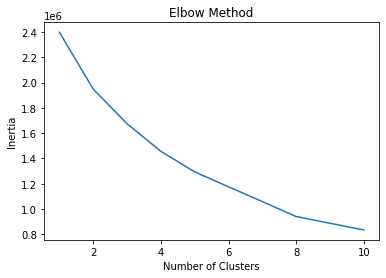

In [33]:
# Determine optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=2048)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
# perform KMeans clustering with 6 clusters (determined from elbow method)
kmeans = KMeans(n_clusters=6, random_state=2048)
kmeans.fit(data_scaled)

KMeans(n_clusters=6, random_state=2048)

In [35]:
# Add cluster labels to data
df['Cluster'] = kmeans.labels_

In [36]:
# Display the clusters and their characteristics
for i in range(kmeans.n_clusters):
    cluster = df[df['Cluster'] == i]
    print('Cluster {}:'.format(i))
    print('  - Size: {}'.format(len(cluster)))
    print('  - Average age: {:.2f}'.format(cluster['Age'].mean()))
    print('  - Average income: {:.2f}'.format(cluster['Income'].mean()))
    print('  - Average Spending score: {:.2f}'.format(cluster['Total_Debit_Amount'].mean()))
    print('  - Average Credit score: {:.2f}'.format(cluster['Credit_Score'].mean()))
    print('  - Common Card Type: {}'.format(cluster['Card_Type'].mode().values[0]))
    print('  - Common Gender: {}'.format(cluster['Gender'].mode().values[0]))

Cluster 0:
  - Size: 95223
  - Average age: 37.21
  - Average income: 748562638.31
  - Average Spending score: 274337006.51
  - Average Credit score: 720.53
  - Common Card Type: Citibank
  - Common Gender: Female
Cluster 1:
  - Size: 109018
  - Average age: 44.20
  - Average income: 220764701.85
  - Average Spending score: 106470015.33
  - Average Credit score: 564.94
  - Common Card Type: American Express
  - Common Gender: Male
Cluster 2:
  - Size: 95850
  - Average age: 58.90
  - Average income: 500067533.15
  - Average Spending score: 364633512.08
  - Average Credit score: 446.61
  - Common Card Type: UnionPay
  - Common Gender: Female
Cluster 3:
  - Size: 99818
  - Average age: 58.61
  - Average income: 717367329.12
  - Average Spending score: 128760770.87
  - Average Credit score: 598.41
  - Common Card Type: Wells Fargo
  - Common Gender: Male
Cluster 4:
  - Size: 98113
  - Average age: 48.63
  - Average income: 255272570.30
  - Average Spending score: 361791987.75
  - Average 

Based on the characteristics highlighted, here are some suitable names for each cluster:

Cluster 0: Prudent Elite

Cluster 1: Established Earners

Cluster 2: Silver Sages

Cluster 3: Financial Titans

Cluster 4: Trendsetters

Cluster 5: Millennial Moguls

In [37]:
df.head()

,Fullname,Gender,Date_of_Birth,Occupation,Location,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score,Age,Cluster
0,Mrs. Grace Vaughan,Female,1990-08-05,Bookkeeper,Michigan,302-08-8444,True,Grace_Vaughan1627@gnjps.digital,4-213-101-7036,No Card,258315802.0,308043053.0,406,33,5
1,Ms. Jacqueline Briggs,Female,1953-11-15,Clerk,Maryland,725-14-2448,True,Jacqueline_Briggs6834@c2nyu.online,5-156-354-7264,No Card,181120665.0,495779767.0,553,70,2
2,Miss Hannah Yoman,Female,1979-10-24,Physician,West Virginia,412-76-2351,False,Hannah_Yoman5229@3wbkp.video,7-608-541-8570,No Card,532694945.0,25833075.0,646,44,1
3,Ms. Sienna Stone,Female,1961-06-24,Cashier,North Carolina,540-47-8854,True,Sienna_Stone 1629@chkzl.website,6-125-821-2555,No Card,557429898.0,166084149.0,379,62,2
4,Ms. Sharon Bishop,Female,1987-08-09,Pharmacist,New Mexico,671-84-1551,False,Sharon_Bishop2466@jh02o.edu,8-116-884-8477,No Card,373293681.0,146564099.0,600,36,1


In [38]:
# Define the mapping from old cluster labels to new ones
cluster_mapping = {0: 'Prudent Elite', 1: 'Established Earners', 2: 'Silver Sages', 3: 'Financial Titans', 4: 'Trendsetters', 5: 'Millennial Moguls'}

# Apply the mapping to the cluster labels using the map() function
df['Cluster'] = df['Cluster'].map(cluster_mapping)

In [39]:
df.head(5)

,Fullname,Gender,Date_of_Birth,Occupation,Location,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score,Age,Cluster
0,Mrs. Grace Vaughan,Female,1990-08-05,Bookkeeper,Michigan,302-08-8444,True,Grace_Vaughan1627@gnjps.digital,4-213-101-7036,No Card,258315802.0,308043053.0,406,33,Millennial Moguls
1,Ms. Jacqueline Briggs,Female,1953-11-15,Clerk,Maryland,725-14-2448,True,Jacqueline_Briggs6834@c2nyu.online,5-156-354-7264,No Card,181120665.0,495779767.0,553,70,Silver Sages
2,Miss Hannah Yoman,Female,1979-10-24,Physician,West Virginia,412-76-2351,False,Hannah_Yoman5229@3wbkp.video,7-608-541-8570,No Card,532694945.0,25833075.0,646,44,Established Earners
3,Ms. Sienna Stone,Female,1961-06-24,Cashier,North Carolina,540-47-8854,True,Sienna_Stone 1629@chkzl.website,6-125-821-2555,No Card,557429898.0,166084149.0,379,62,Silver Sages
4,Ms. Sharon Bishop,Female,1987-08-09,Pharmacist,New Mexico,671-84-1551,False,Sharon_Bishop2466@jh02o.edu,8-116-884-8477,No Card,373293681.0,146564099.0,600,36,Established Earners


In [42]:
df.sample(10)

,Fullname,Gender,Date_of_Birth,Occupation,Location,Customer_ID,Marital Status,Email_Address,Phone_Number,Card_Type,Income,Total_Debit_Amount,Credit_Score,Age,Cluster
181082,Ms. Kenzie Harper,Female,1976-12-11,Call Center Representative,New Mexico,343-37-0805,False,Kenzie_Harper9161@yafr7.biz,4-053-541-4221,Capital One,596450227.0,317518615.0,748,47,Prudent Elite
16991,Mr. Nate Rycroft,Male,1959-08-02,Loan Officer,Massachusetts,272-87-4745,False,Nate_Rycroft7236@ohqqh.media,0-867-577-6208,Citibank,178659108.0,288277587.0,482,64,Silver Sages
254142,Mrs. Paige Goodman,Female,1977-02-08,Mobile Developer,Pennsylvania,738-44-3044,False,Paige_Goodman867@nmz0p.mobi,7-367-660-0806,Bank of America,54305947.0,476094064.0,335,46,Silver Sages
185021,Mr. Javier Jones,Male,1969-11-29,Banker,Missouri,050-40-2434,False,Javier_Jones3042@jcf8v.ca,7-075-445-7083,UnionPay,124880799.0,147663679.0,778,54,Established Earners
187289,Ms. Lara Hunt,Female,1954-05-24,Executive Director,South Dakota,374-71-8751,True,Lara_Hunt363@d9un8.store,8-676-408-5253,Chase,332741907.0,81374055.0,710,69,Financial Titans
425746,Miss Paige Rodwell,Female,1988-02-16,HR Coordinator,Georgia,302-02-7402,False,Paige_Rodwell3883@nanoff.app,5-782-564-5020,Bank of America,429637669.0,202317736.0,744,35,Prudent Elite
531635,Mr. Johnny Wilkinson,Male,1991-03-23,Software Engineer,Arizona,603-26-7272,True,Johnny_Wilkinson1660@ag5wi.net,8-407-152-1074,Discover,906292851.0,134344033.0,381,32,Millennial Moguls
103559,Miss Carla Antcliff,Female,1971-02-09,Project Manager,Alabama,471-31-1801,False,Carla_Antcliff5314@bu2lo.store,2-318-431-0246,No Card,999924525.0,458903112.0,637,52,Prudent Elite
26819,Mr. Kieth Milner,Male,1958-07-12,Loan Officer,Oklahoma,356-88-3031,True,Kieth_Milner4633@6ijur.site,0-077-174-7655,Maestro,526195480.0,384301410.0,389,65,Silver Sages
444221,Ms. Gwenyth Moreno,Female,1976-10-13,Steward,Colorado,223-45-4427,False,Gwenyth_Moreno2067@qu9ml.design,7-155-813-1475,Discover,469697972.0,392037841.0,815,47,Trendsetters


In [41]:
# Save the cleaned data to a new CSV file for Dashboard
df.to_csv('real_customer__segmentation_data.csv', index=False)

Please refer to my Dashboard for the visualization and the project proposal document for the thought process of this project.
For further clarity on any part, my LinkedIn is just a chat away!

<a href="https://linkedin.com/in/akonusoh">LinkedIn Page</a>